In [1]:
import os
import sys
from utils.nrel_uitls import CLIMATEZONES, RESTYPES
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
import numpy as np
import h5py
from storage import upload_to_bucket

from simulate import BatchSimulator


INFO:Storage:Successfully fetched bucket location
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from schema import Schema, ShoeboxGeometryParameter, BuildingTemplateParameter, WhiteboxSimulation, WindowParameter, SchedulesParameters
schema = Schema()

In [3]:
from storage import download_from_bucket

# download_from_bucket(blob_name=f"results/batch_00016_results.hdf5", file_name="./data/hdf5/batch_00016_results.hdf5")
# blob name = folder from web bucket

In [4]:
with h5py.File("./data/hdf5/batch_00016_results.hdf5", 'r') as f:
    monthly = f["monthly"][...] # this loads the whole batch into memory!
    total_heating = f["total_heating"][...] # this loads the whole batch into memory!
    total_cooling = f["total_cooling"][...] # this loads the whole batch into memory!
    errors = f["errors"][...]
    area = f["area"][...]

batch_runner = BatchSimulator(schema, batch_id=16, processes=5, input_bucket_slug="test_batches")
batch = batch_runner.storage_batch


INFO:Batch Simulator:--------- Batch Simulation ---------
INFO:Batch Simulator:Batch ID: 16
INFO:Batch Simulator:Opening HDF5 storage batch file for batch 16...
INFO:Batch Simulator:Loaded BATCH:16, which has 2000 design vectors
INFO:Batch Simulator:Building parallel dict config for BATCH:16...


In [5]:
problems = np.argwhere(errors).flatten()
print(problems)

[   0    2    5    7    8   10   13   15   17   18   19   23   24   26
   29   30   31   33   34   37   38   39   41   48   49   51   55   87
  100  102  103  104  106  107  108  110  114  116  119  120  122  123
  124  125  126  127  129  130  131  132  133  134  135  136  137  138
  140  141  142  143  144  146  148  149  152  153  155  156  158  159
  164  170  173  174  175  179  181  182  184  186  188  189  190  191
  192  199  200  201  202  203  204  207  208  209  210  211  212  213
  214  215  216  218  219  220  221  222  223  224  226  229  230  231
  232  233  234  235  236  237  239  240  242  243  244  245  246  247
  248  249  250  252  255  256  257  258  260  261  263  266  268  269
  274  275  276  278  279  280  281  282  284  286  290  291  292  293
  295  296  298  299  300  303  304  307  308  310  311  312  313  314
  317  318  324  325  327  328  330  331  335  336  338  339  340  341
  343  344  345  348  360  365  366  402  406  407  408  409  410  411
  413 

HERE IS THE ERROR FOR  Block Perim Storey 0 Roof 0001
w  4.466724943838966
adiab_2_area  1.0
scaled_coords  Polygon3D([Vector3D(0.0, 0.0, 3.5811556079264943), Vector3D(0.0, 1.2961883099008975, 3.5811556079264943), Vector3D(0.0, 1.2961883099008975, 3.5811556079264943), Vector3D(0.0, 0.0, 3.5811556079264943)])
HERE IS THE ERROR FOR  Block Perim Storey 0 Roof 0001
w  4.466724943838966
adiab_2_area  0.9
scaled_coords  Polygon3D([Vector3D(0.4466724943838965, 0.0, 3.5811556079264943), Vector3D(0.4466724943838965, 1.2961883099008975, 3.5811556079264943), Vector3D(0.0, 1.2961883099008975, 3.5811556079264943), Vector3D(0.0, 0.0, 3.5811556079264943)])
HERE IS THE ERROR FOR  Block Core Storey 0 Roof 0001
w  4.466724943838966
adiab_2_area  0.9
scaled_coords  Polygon3D([Vector3D(0.4466724943838965, 1.2961883099008975, 3.5811556079264943), Vector3D(0.4466724943838965, 4.412268105229877, 3.5811556079264943), Vector3D(0.0, 4.412268105229877, 3.5811556079264943), Vector3D(0.0, 1.2961883099008975, 3.581

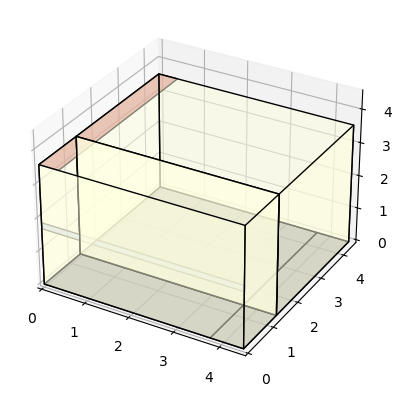

<Figure size 640x480 with 0 Axes>

In [15]:
v = batch[problems[0]]
try:
    sim = WhiteboxSimulation(schema, v)
    sim.summarize()
    sim.shoebox.view_model()
except:
    if schema['roof_2_footprint'].extract_storage_values(v) > 0.98:
        schema.update_storage_vector(v, 'roof_2_footprint', 0.9)
    sim = WhiteboxSimulation(schema, v)
    sim.summarize()
    sim.shoebox.view_model()


In [7]:
sim.simulate()

C:\EnergyPlusV9-2-0\ExpandObjects.EXE #0-25e81f1c-f373-11ed-b49c-95bb7acbb164.idf: 4.00it [00:00, 35.1it/s]
C:\EnergyPlusV9-2-0\energyplus.exe 25e81f1c-f373-11ed-b49c-95bb7acbb164.idf: 56it [00:01, 30.21it/s]


(IndexGroup                                               System  \
 KeyValue            BLOCK PERIM STOREY 0 IDEAL LOADS AIR SYSTEM   
 Name                 Zone Ideal Loads Zone Total Heating Energy   
 2018-01-01 00:00:00                                1.157590e+06   
 2018-01-01 01:00:00                                1.206041e+06   
 2018-01-01 02:00:00                                1.210509e+06   
 2018-01-01 03:00:00                                1.207725e+06   
 2018-01-01 04:00:00                                1.201960e+06   
 ...                                                         ...   
 2018-12-31 19:00:00                                1.183516e+06   
 2018-12-31 20:00:00                                1.195891e+06   
 2018-12-31 21:00:00                                1.207317e+06   
 2018-12-31 22:00:00                                1.214423e+06   
 2018-12-31 23:00:00                                1.219111e+06   
 
 IndexGroup                                   

In [11]:
print(schema['width'].extract_storage_values(batch[problems[1]]))
print(schema['roof_2_footprint'].extract_storage_values(batch[problems[1]]))


4.444913878017212
1.0
